# Лабораторна робота №3

### Студентки групи МІТ-31 (підгрупа 2)

### Булгакової Анни Юріївни

## Завдання
 

**Частина 1: Бінарна класифікація на згенерованому наборі даних**

**Завдання**:
1. Згенеруйте набір даних для бінарної класифікації за допомогою бібліотеки Scikit-Learn. Набір даних повинен містити дві числові ознаки і два класи. Використовуйте `make_classification` для генерації даних.
2. Розділіть дані на навчальний та тестовий набори.
3. Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів).
4. Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук, F1-середнє та AUC-ROC.
5. Візуалізуйте результати, включаючи матрицю плутанини та графік ROC-кривої.

**Частина 2: Мультикласова класифікація на згенерованому наборі даних**

**Завдання**:
1. Згенеруйте набір даних для мультикласової класифікації з трьома і більше класами за допомогою Scikit-Learn. Набір даних повинен містити числові ознаки та багато класів.
2. Розділіть дані на навчальний та тестовий набори.
3. Навчіть класифікатори для мультикласової класифікації.
4. Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук, F1-середнє та матриця плутанини.
5. Порівняйте результати різних класифікаторів.

**Частина 3: Мультилейбл класифікація на реальному наборі даних з Інтернету**

**Завдання**:
1. Знайдіть реальний набір даних для мультилейбл класифікації на веб-сайті Kaggle (або іншому джерелі даних).
2. Завантажте цей набір даних і розробіть процедуру для його очищення та підготовки до аналізу.
3. Розділіть дані на навчальний та тестовий набори.
4. Навчіть класифікатор для мультилейбл класифікації (наприклад, з використанням багатошарової нейронної мережі).
5. Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.
6. Проведіть аналіз результатів та вивчіть, які фактори впливають на ефективність моделі в контексті мультилейбл класифікації.

Отримані результати викласти на github у свій репозиторій  в папку Lab3.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
import warnings
warnings.filterwarnings("ignore")

завдання 1

Accuracy: 0.90
Precision: 0.92
Recall: 0.86
F1 Score: 0.89
AUC-ROC: 0.95


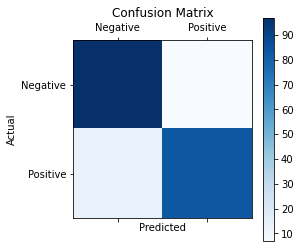

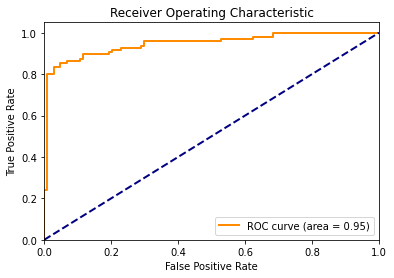

In [8]:
# Генеруємо набір даних
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Розділяємо дані на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчаємо класифікатор (логістична регресія)
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Прогноз на тестовому наборі
y_pred = classifier.predict(X_test)

# Оцінка класифікатора за допомогою різних метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')

# Візуалізація матриці плутанини
confusion = confusion_matrix(y_test, y_pred)
plt.matshow(confusion, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Візуалізація ROC-кривої
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Значення точності становить 0.90, що свідчить про те, що класифікатор правильно класифікував близько 90% зразків у тестовому наборі. Ця метрика показує загальну правильність класифікації.

Precision дорівнює 0.92, що означає, що більшість позитивних прогнозів були правильними. Тобто, коли класифікатор визначив, що зразок належить до позитивного класу, то в 92% випадків це було правильно.

Значення відгуку складає 0.86, що вказує на те, що класифікатор визначив лише 86% всіх позитивних зразків у тестовому наборі. Ця метрика вказує на здатність класифікатора виявляти всі позитивні зразки.

Значення F1-середнього дорівнює 0.89, що представляє собою гармонічний середній між точністю та відгуком. Ця метрика враховує як точність, так і відгук, і особливо корисна, коли необхідно збалансувати обидві ці характеристики.

Значення AUC-ROC становить 0.95, що є досить високим. Ця метрика вказує на здатність класифікатора розділити позитивні та негативні зразки, де значення 0.5 відповідало б випадковому класифікатору, а значення близько 1 вказує на дуже ефективний класифікатор.

Отже, класифікатор показав досить високу ефективність у класифікації даних


завдання 2

In [12]:
# генеруємо набір даних 
X, y = make_classification(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, random_state=42)

# розділяємо дані на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# створення та навчання класифікаторів
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_svm = SVC(kernel='linear', random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)

clf_lr.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)

# функція для оцінки метрик класифікатора
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'Оцінки для класифікатора {type(classifier).__name__}:')
    print(f'Точність: {accuracy}')
    print(f'Відгук: {recall}')
    print(f'F1-середнє: {f1}')
    print('Матриця плутанини:')
    print(conf_matrix)

print("Оцінки для логістичної регресії:")
evaluate_classifier(clf_lr, X_test, y_test)

print("Оцінки для методу опорних векторів:")
evaluate_classifier(clf_svm, X_test, y_test)

print("Оцінки для рішучих дерев:")
evaluate_classifier(clf_dt, X_test, y_test)

Оцінки для логістичної регресії:
Оцінки для класифікатора LogisticRegression:
Точність: 0.855
Відгук: 0.855
F1-середнє: 0.8550208174178764
Матриця плутанини:
[[55  4  8]
 [ 9 47  1]
 [ 5  2 69]]
Оцінки для методу опорних векторів:
Оцінки для класифікатора SVC:
Точність: 0.86
Відгук: 0.86
F1-середнє: 0.8602213918157315
Матриця плутанини:
[[57  2  8]
 [12 45  0]
 [ 4  2 70]]
Оцінки для рішучих дерев:
Оцінки для класифікатора DecisionTreeClassifier:
Точність: 0.89
Відгук: 0.89
F1-середнє: 0.8893835371399261
Матриця плутанини:
[[55  7  5]
 [ 7 50  0]
 [ 2  1 73]]


Всі три класифікатори показали непогані результати на цьому наборі даних.
Дерева прийняття рішень дали найкращий результат, з найвищою точністю та F1-середнім.
Логістична регресія та SVM показали подібні результати, але мають деяку конфузію між деякими класами.

завдання 3

In [60]:
data = pd.read_csv("goodreads_data.csv").drop("Unnamed: 0", axis=1)

# обробка даних видалення усіх рядків зі значеннями NULL дублікатів
data = data.dropna()
data = data.drop_duplicates()

data.head()

,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [68]:
df = data.copy()
df = df[['Description', 'Genres']]
df

,Description,Genres
0,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ..."
1,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
2,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical..."
3,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp..."
4,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',..."
...,...,...
9995,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp..."
9996,Jeth Cavanaugh is searching for a new life alo...,[]
9997,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A..."
9998,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance..."


In [74]:
is_fiction = list()
is_nonfiction = list()
is_fantasy = list()
is_classics = list()
is_romance = list()

def make_genre_map_list(genres, listname, genrename): #присвоює 0 або 1 взалежносі до приналежності до жанру
    if genrename in genres:
        listname.append(1)
    else:
        listname.append(0)

for s in df['Genres']:
    # отримуємо жанри із кожного із рядків
    genres = [genre.strip(" '") for genre in s.strip("[]").split(",")]
    
    make_genre_map_list(genres, is_fiction, 'Fiction')
    make_genre_map_list(genres, is_nonfiction, 'Nonfiction')
    make_genre_map_list(genres, is_fantasy, 'Fantasy')
    make_genre_map_list(genres, is_classics, 'Classics')
    make_genre_map_list(genres, is_romance, 'Romance')
    
# створюємо стовбець в датасеті і присвоюємо список приналежності до жанру
df['is_fiction'] = is_fiction
df['is_nonfiction'] = is_nonfiction 
df['is_fantasy'] = is_fantasy 
df['is_classics'] = is_classics
df['is_romance'] = is_romance

In [75]:
df.head()

,Description,Genres,is_fiction,is_nonfiction,is_fantasy,is_classics,is_romance
0,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",1,0,0,1,0
1,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",1,0,1,1,0
2,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",1,0,0,1,1
3,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",0,1,0,1,0
4,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",1,0,1,1,0


In [82]:
y = df.drop(['Description', 'Genres'], axis=1)

# розділяємо дані на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(data['Description'], y, test_size=0.20, random_state=42)

# векторизація тексту за допомогою TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultiOutputClassifier(XGBClassifier())

clf.fit(X_train_tfidf, y_train)

score = clf.score(X_train_tfidf, y_train)
print(f'Accuracy on train data: {score}')

y_pred = clf.predict(X_test_tfidf )

# оцінка точності та інші метрики
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Accuracy on train data: 0.9105568153187201
Accuracy on test data: 0.4574307304785894
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1148
           1       0.82      0.66      0.73       459
           2       0.77      0.42      0.54       439
           3       0.72      0.47      0.57       418
           4       0.72      0.40      0.51       299

   micro avg       0.77      0.66      0.71      2763
   macro avg       0.76      0.57      0.64      2763
weighted avg       0.77      0.66      0.69      2763
 samples avg       0.67      0.59      0.61      2763



Загалом моя модель має відносно непогані результати, але мені здається через замалу для неї кількість даних є, що в ній покращувати, я пробувала використовувати інші моделі, але вони показали гірний результат.

Деякі класи мають високу точність, наприклад, клас 0 має точність 0.78, що означає, що більшість визнаних як клас 0 даних є вірними.
Проте деякі класи мають низький відгук, наприклад, клас 2 має відгук 0.42, що означає, що багато екземплярів цього класу не були визнані моделлю.
Деякі класи мають низьку F1-меру, що свідчить про незадовільну ефективність моделі.
Деякі класи мають гарну точність, але поганий відгук, що означає, що модель має тенденцію до FP.